###Import Data Training - Validation

In [ ]:
import numpy as np
import pandas as pd
from google.colab import files
# Memuat data
uploaded = files.upload()
# Membaca dataset
df = pd.read_excel('Data_Citra Sindy Reynilda_2043211041.xlsx')
print(df)

Saving Data_Citra Sindy Reynilda_2043211041.xlsx to Data_Citra Sindy Reynilda_2043211041.xlsx
       Time        V1        V2        V3        V4        V5        V6  \
0     70707 -0.302187  0.164546  1.402801 -0.778629 -0.403224 -1.124800   
1     70709 -4.505690 -2.280196  0.213977 -1.947912 -1.008778 -0.331094   
2     70709 -1.374912  0.798765 -1.707117 -2.674925  1.445206  2.975923   
3     70709 -3.568670  2.861201 -0.801006 -1.462937 -1.819171 -1.267393   
4     70709 -0.883744  1.231187 -0.771940 -1.116030  2.224204  3.168921   
...     ...       ...       ...       ...       ...       ...       ...   
9995  74906  1.091549  0.072959  0.773836  1.781595 -0.631097  0.287602   
9996  74906 -0.574597  0.835163  0.405946  1.022859 -0.316824  0.028596   
9997  74907  0.138413 -2.197478  0.195144  0.395791 -1.263450  0.616044   
9998  74907  1.122866 -1.855822  0.207881 -1.322298 -1.711198 -0.265297   
9999  74907  1.203064  0.111665  0.367861  0.444995 -0.300542 -0.476322   

     

###Import Data Testing

In [ ]:
from google.colab import files
# Memuat data
uploaded = files.upload()
# Membaca dataset
test = pd.read_excel('Data Testing ETS.xlsx')
print(test)

Saving Data Testing ETS.xlsx to Data Testing ETS.xlsx
       Time        V1        V2        V3        V4        V5        V6  \
0    164365 -0.196748  1.003610 -0.081525 -0.938730  0.905379 -0.302108   
1    164366  1.856495 -0.618702 -0.558401  0.326145 -0.509106  0.582880   
2    164366 -1.716560  1.059585  1.282640 -0.822278 -0.194845 -0.242404   
3    164367  0.079927  0.742461 -0.275287 -1.026706  1.136571  0.076862   
4    164367 -2.559942  0.891091 -0.471354 -4.485545  0.820467  3.776763   
..      ...       ...       ...       ...       ...       ...       ...   
995  169142 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
996  169347  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
997  169351 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
998  169966 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
999  170348  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

           V7        V8        V9  ...       

###Karakteristik Data

<ipython-input-3-8e6672f0df03>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class'] == 0]['Amount'], label='Non-Fraud', shade=True)
<ipython-input-3-8e6672f0df03>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class'] == 1]['Amount'], label='Fraud', shade=True, color='red')


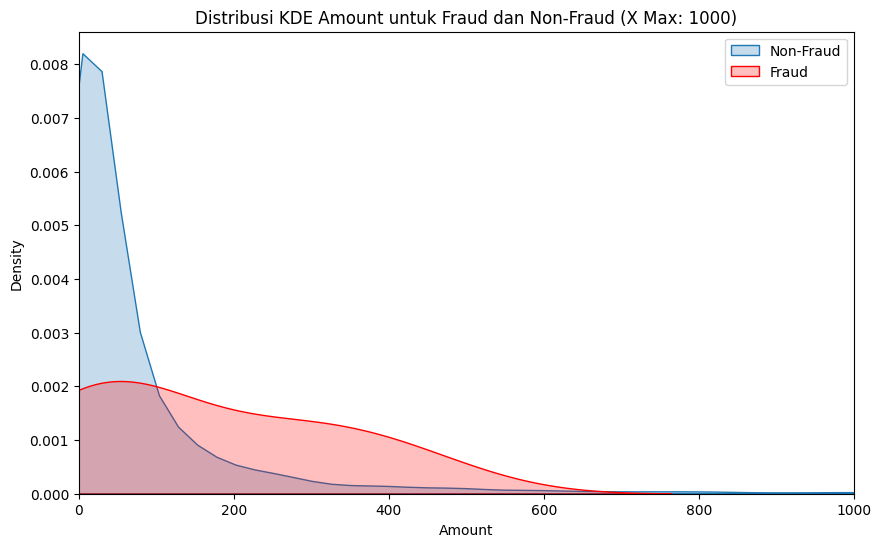

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# KDE Plot untuk distribusi Amount dari transaksi fraud dan non-fraud
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['Class'] == 0]['Amount'], label='Non-Fraud', shade=True)
sns.kdeplot(df[df['Class'] == 1]['Amount'], label='Fraud', shade=True, color='red')

# Membatasi Amount hingga maksimum 1000
plt.xlim(0, 1000)

# Menambahkan judul dan label
plt.title('Distribusi KDE Amount untuk Fraud dan Non-Fraud (X Max: 1000)')
plt.xlabel('Amount')
plt.ylabel('Density')
plt.legend()
plt.show()

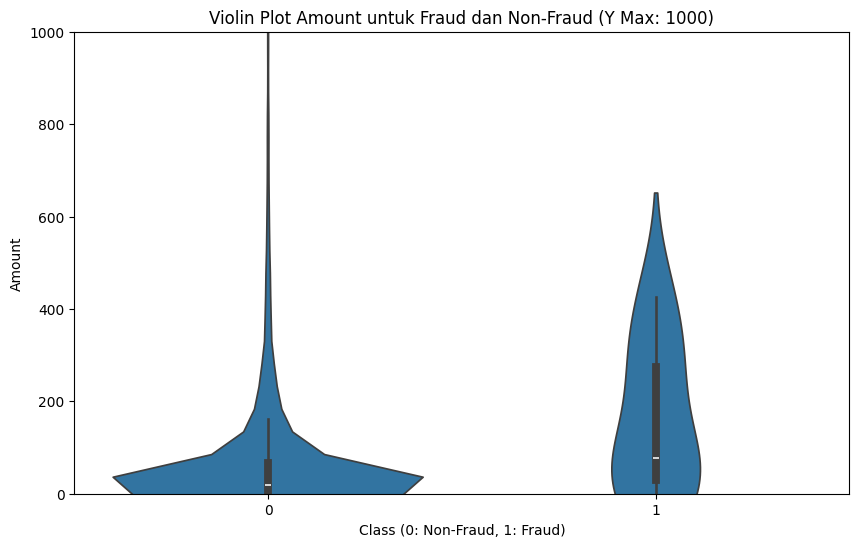

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Violin Plot untuk distribusi Amount berdasarkan kelas (fraud dan non-fraud)
plt.figure(figsize=(10, 6))
sns.violinplot(x='Class', y='Amount', data=df)

# Membatasi sumbu Y hingga maksimum 1000
plt.ylim(0, 1000)

# Menambahkan judul dan label
plt.title('Violin Plot Amount untuk Fraud dan Non-Fraud (Y Max: 1000)')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Amount')
plt.show()

### Definisi dan Pembagian Data Training - Validation, & Testing Model Prediksi

In [ ]:
import random
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Set seed global
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# Definisi variabel data training - validation
X = df.filter(regex='^V').values
y = df['Amount'].values

# Bagi data menjadi data training (80%) dan data validation (20%)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Devinisi variabel data testing
X_test = test.filter(regex='^V').values  # Prediktor di dataset test

###Model Prediksi Radial Basis Function NN (BFNN)

In [ ]:
import numpy as np
import random
import tensorflow as tf
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn.cluster import KMeans
from sklearn.metrics import mean_absolute_percentage_error

# Set seed global
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

class RBFNN:
    def __init__(self, num_centers, sigma):
        self.num_centers = num_centers
        self.sigma = sigma
        self.centers = None
        self.weights = None

    def _rbf_function(self, x, center):
        return np.exp(-np.linalg.norm(x - center)**2 / (2 * self.sigma**2))

    def _calculate_activations(self, X):
        num_samples = X.shape[0]
        activations = np.zeros((num_samples, self.num_centers))

        for i in range(num_samples):
            for j in range(self.num_centers):
                activations[i, j] = self._rbf_function(X[i], self.centers[j])

        return activations

    def fit(self, X, y):
        kmeans = KMeans(n_clusters=self.num_centers).fit(X)
        self.centers = kmeans.cluster_centers_
        activations = self._calculate_activations(X)
        self.weights = np.linalg.pinv(activations.T @ activations) @ activations.T @ y

    def predict(self, X):
        activations = self._calculate_activations(X)
        output = activations @ self.weights

        # Terapkan ReLU untuk memastikan output positif
        return np.maximum(0, output)

# Inisialisasi dan latih model RBFNN
num_centers = 800  # Jumlah pusat RBF
sigma = 10          # Parameter sigma (lebar Gaussian)

rbf_nn = RBFNN(num_centers=num_centers, sigma=sigma)
rbf_nn.fit(X_train, y_train)

# Evaluasi model menggunakan data validation
y_val_pred = rbf_nn.predict(X_val)

# Menghitung berbagai metrik evaluasi
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
mae_val = mean_absolute_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

# Tampilkan metrik evaluasi
print(f"Root Mean Squared Error (Validation): {rmse_val:.3f}")
print(f"Mean Absolute Error (Validation): {mae_val:.3f}")
print(f"R-squared (Validation): {r2_val:.3f}")

# Prediksi dengan data test (tanpa target Y)
y_test_pred = rbf_nn.predict(X_test)

# Tampilkan hasil prediksi untuk data test
print("Prediksi untuk data test:", y_test_pred)

Root Mean Squared Error (Validation): 14.412
Mean Absolute Error (Validation): 4.486
R-squared (Validation): 0.992
Prediksi untuk data test: [1.23245001e+01 7.32180477e+01 2.15744406e+01 1.41237149e+01
 3.17686598e+00 5.49983735e+01 1.20870402e+01 2.30203424e+02
 1.16806669e+01 3.97460310e+00 2.92312963e+00 3.17869873e+00
 9.97535847e+00 8.36882014e+01 2.22853914e+01 2.14576370e+00
 1.82317092e+01 0.00000000e+00 6.88684673e+01 0.00000000e+00
 2.78118781e+02 1.14711666e+02 7.14368812e+01 1.13259377e+01
 0.00000000e+00 1.18315155e+02 2.90222064e+01 1.10873396e+02
 4.92237301e+01 0.00000000e+00 8.09290653e+00 1.06529692e+01
 7.49816658e+01 2.08133019e+02 3.21185814e+02 3.08332762e+01
 1.39933439e+02 1.11314440e+01 7.58863695e+01 8.16328132e+01
 3.48271287e+01 4.92567250e+01 1.92408051e+01 5.60015557e+01
 2.56153884e+02 1.77726499e+02 1.00861613e+01 1.53719023e+02
 1.68892223e+01 2.34014164e+01 5.51844055e+01 4.69413875e+01
 3.57808246e+01 2.96226495e+01 1.22391317e+01 2.44082491e+02
 0.00

In [ ]:
# Simpan hasil prediksi ke dalam DataFrame
df_predictions = pd.DataFrame(y_test_pred, columns=['Predicted Values'])

# Simpan DataFrame ke file Excel
df_predictions.to_excel("Prediksi_RBFNN.xlsx", index=False)

print("Hasil prediksi telah disimpan ke dalam file Prediksi_RBFNN.xlsx.")

Hasil prediksi telah disimpan ke dalam file Prediksi_RBFNN.xlsx.


###Model Prediksi Multi-Layer Perceptron (MLP)

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.layers import ELU
from keras.layers import Activation

# Set seed global
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# Membangun model MLP
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='elu'))  # Lapisan input
model.add(Dense(32, activation='elu'))  # Lapisan tersembunyi
model.add(Dense(1, activation='relu'))  # Lapisan output dengan ReLU untuk non-negatif

# Kompilasi model
model.compile(optimizer='adam', loss='mean_squared_error')

# Menambahkan Early Stopping untuk menghindari overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Melatih model
model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Melakukan prediksi pada data validasi
y_val_pred = model.predict(X_val)

# Menghitung berbagai metrik evaluasi
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
mae_val = mean_absolute_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

# Tampilkan metrik evaluasi
print(f"Root Mean Squared Error (Validation): {rmse_val:.3f}")
print(f"Mean Absolute Error (Validation): {mae_val:.3f}")
print(f"R-squared (Validation): {r2_val:.3f}")

# Melakukan prediksi pada data test
y_test_pred = model.predict(X_test)

# Terapkan ReLU secara manual untuk memastikan tidak ada prediksi negatif
y_test_pred = np.maximum(0, y_test_pred)

# Menampilkan hasil prediksi untuk data test
print("Hasil Prediksi untuk Data Test:")
print(y_test_pred)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 44453.1758 - val_loss: 23036.9902
Epoch 2/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 28450.8203 - val_loss: 6977.9414
Epoch 3/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8827.4482 - val_loss: 1843.1864
Epoch 4/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3501.7124 - val_loss: 1148.6987
Epoch 5/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2500.9900 - val_loss: 912.1827
Epoch 6/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2077.2017 - val_loss: 756.9338
Epoch 7/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1783.8574 - val_loss: 633.9474
Epoch 8/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1552.2770 - val_loss: 551.1522
Epoch 9/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1310.1490 - val_loss: 463.5395
Epoch 10/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1107.0432 - val_loss: 394.1248
Epoch 11/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 947.2515 -

In [ ]:
# Simpan hasil prediksi ke dalam DataFrame dan ke file Excel
results_df = pd.DataFrame({
    'Prediksi': y_test_pred.flatten()  # Mengubah array 2D menjadi 1D
})

# Menyimpan ke file Excel
results_df.to_excel('Prediksi_MLP.xlsx', index=False)
print("Hasil prediksi disimpan ke 'Prediksi_MLP.xlsx'")

Hasil prediksi disimpan ke 'Prediksi_MLP.xlsx'


### Definisi dan Pembagian Data Training - Validation Model Klasifikasi

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Set seed global
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# Definisi variabel data training - validation
X2 = df.filter(regex='^V').values
y2 = df['Class']

# Bagi data menjadi data training (80%) dan data validation (20%)
X2_train, X2_val, y2_train, y2_val = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Devinisi variabel data testing
X_test = test.filter(regex='^V').values  # Prediktor di dataset test

###Pemeriksaan Distribusi Kelas dan Penanganan Imbalance Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung jumlah setiap kelas
class_counts = y2_train.value_counts()
print(class_counts)

# Menampilkan jumlah
print(f"Jumlah Non-Fraud (0): {class_counts.get(0, 0)}")
print(f"Jumlah Fraud (1): {class_counts.get(1, 0)}")

Class
0    7995
1       5
Name: count, dtype: int64
Jumlah Non-Fraud (0): 7995
Jumlah Fraud (1): 5


<ipython-input-7-0dd7c80e139b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


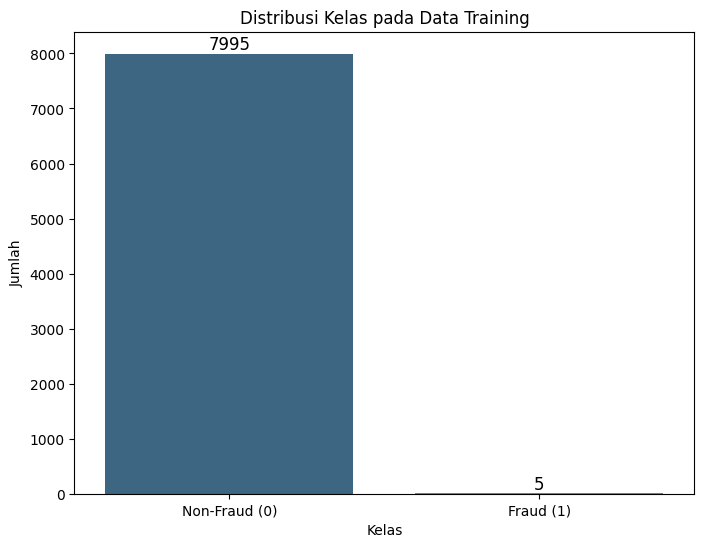

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mengatur ukuran gambar
plt.figure(figsize=(8, 6))

# Membuat barplot dari jumlah masing-masing kelas
barplot = sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")

# Menambahkan label
plt.title("Distribusi Kelas pada Data Training")
plt.xlabel("Kelas")
plt.ylabel("Jumlah")
plt.xticks(ticks=class_counts.index.astype(str), labels=['Non-Fraud (0)', 'Fraud (1)'])

# Menambahkan label jumlah di atas setiap batang
for p in barplot.patches:
    barplot.annotate(f'{int(p.get_height())}',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='bottom',
                     fontsize=12, color='black')

# Menampilkan plot
plt.show()

In [ ]:
!pip install imbalanced-learn
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Inisialisasi SMOTE dengan n_neighbors=3
# (dikurangi dari default 5 menjadi 3, atau nilai lain yang kurang dari jumlah minimum sample di kelas minoritas)
smote = SMOTE(random_state=42, k_neighbors=3)

# Fit SMOTE pada data training
X_resampled, y_resampled = smote.fit_resample(X2_train, y2_train)

# Mengecek jumlah data pada kelas setelah SMOTE
print("Distribusi kelas sebelum SMOTE:")
print(y2_train.value_counts())

print("\nDistribusi kelas setelah SMOTE:")
print(pd.Series(y_resampled).value_counts())

Distribusi kelas sebelum SMOTE:
Class
0    7995
1       5
Name: count, dtype: int64

Distribusi kelas setelah SMOTE:
Class
0    7995
1    7995
Name: count, dtype: int64


<ipython-input-9-dc5f911d6d07>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=y_resampled, palette="viridis")


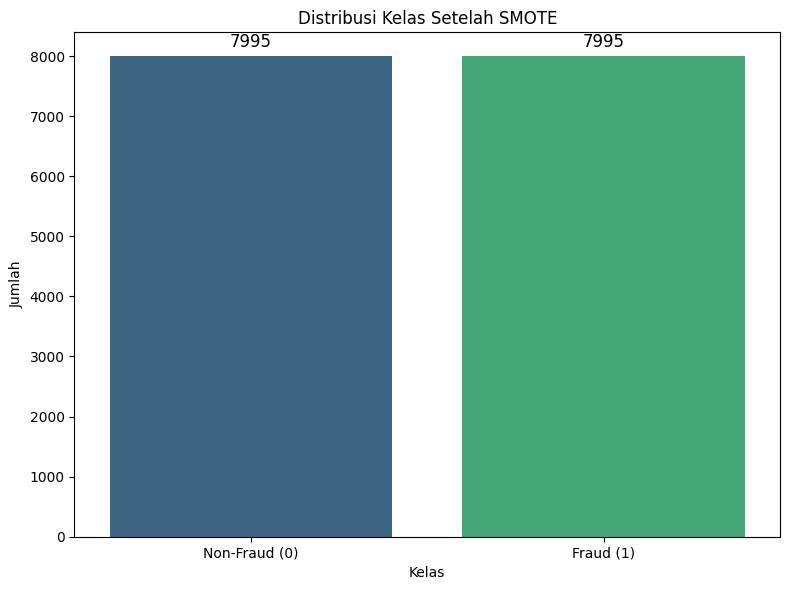

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat plot distribusi setelah SMOTE
plt.figure(figsize=(8,6))

# Plot dengan seaborn
ax = sns.countplot(x=y_resampled, palette="viridis")
plt.title("Distribusi Kelas Setelah SMOTE")
plt.xlabel("Kelas")
plt.ylabel("Jumlah")
plt.xticks(ticks=class_counts.index.astype(str), labels=['Non-Fraud (0)', 'Fraud (1)'])

# Menambahkan label pada setiap batang
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')

# Menampilkan plot
plt.tight_layout()
plt.show()

###Model Klasifikasi Feedforward Neural Network (FNN)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9288 - loss: 0.1774 - val_accuracy: 0.9990 - val_loss: 0.0110
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9995 - loss: 0.0021 - val_accuracy: 0.9995 - val_loss: 0.0092
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9999 - loss: 4.8745e-04 - val_accuracy: 0.9995 - val_loss: 0.0088
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9999 - loss: 2.5847e-04 - val_accuracy: 0.9995 - val_loss: 0.0087
Epoch 5/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 1.0000 - loss: 1.0287e-04 - val_accuracy: 0.9995 - val_loss: 0.0062
Epoch 6/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 1.0000 - loss: 4.8414e-05 - val_accuracy: 0.9995 - val_loss: 0.0070
Epoch 7/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 1.0000 - loss: 3.1808e-05 - val_accuracy: 0.9995 - val_loss: 0.0071
Epoch 8/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 1.0000 - loss: 2.1718e-0

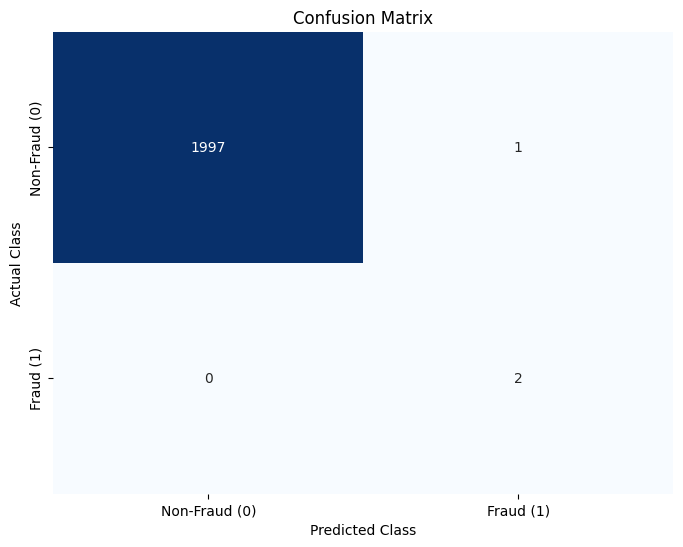

True Positive (TP): 1997
False Negative (FN): 1
True Negative (TN): 2
False Positive (FP): 0
Test Accuracy: 99.95%
Sensitivitas: 99.95%
Spesifisitas: 100.00%
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
     Prediction
0             0
1             0
2             0
3             0
4             0
..          ...
995           1
996           1
997           1
998           1
999           0

[1000 rows x 1 columns]


In [ ]:
import random
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

# Set seed global
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# Membangun model FNN
model = Sequential()
model.add(Dense(64, input_dim=X_resampled.shape[1], activation='relu'))  # Lapisan input
model.add(Dense(32, activation='relu'))  # Lapisan tersembunyi
model.add(Dense(1, activation='sigmoid'))  # Lapisan output (binary classification)

# Mengkompilasi model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping (opsional jika digunakan)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

# Melatih model
history = model.fit(X_resampled, y_resampled, epochs=100, batch_size=32, validation_data=(X2_val, y2_val), verbose=1, callbacks=[early_stopping])

# Menghitung akurasi
loss, accuracy = model.evaluate(X2_val, y2_val)

# Confusion matrix
y_val_pred = (model.predict(X2_val) > 0.5).astype("int32")
conf_matrix = confusion_matrix(y2_val, y_val_pred)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Non-Fraud (0)', 'Fraud (1)'], yticklabels=['Non-Fraud (0)', 'Fraud (1)'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

# Menampilkan nilai dari confusion matrix
TP, FN, FP, TN = conf_matrix.ravel()
print(f'True Positive (TP): {TP}')
print(f'False Negative (FN): {FN}')
print(f'True Negative (TN): {TN}')
print(f'False Positive (FP): {FP}')

# Menghitung sensitivitas dan spesifisitas
sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
specificity = TN / (TN + FP) if (TN + FP) > 0 else 0

# Menampilkan sensitivitas dan spesifisitas
print(f'Test Accuracy: {accuracy * 100:.2f}%')
print(f'Sensitivitas: {sensitivity * 100:.2f}%')
print(f'Spesifisitas: {specificity * 100:.2f}%')

# Membuat prediksi pada data testing
y_test_pred = (model.predict(X_test) > 0.5).astype("int32")

# Menyimpan hasil prediksi ke dalam DataFrame
predictions_df = pd.DataFrame({'Prediction': y_test_pred.flatten()})

# Menampilkan hasil prediksi
print(predictions_df)

In [ ]:
# Menyimpan DataFrame ke file Excel
predictions_df.to_excel("Klasifikasi_FNN.xlsx", index=False)
print("Hasil prediksi disimpan ke 'Klasifikasi_FNN.xlsx'")

Hasil prediksi disimpan ke 'Klasifikasi_FNN.xlsx'


###Model Klasifikasi Convolutional Neural Network (CNN)

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8914 - loss: 0.2034 - val_accuracy: 0.9975 - val_loss: 0.0274
Epoch 2/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9983 - loss: 0.0107 - val_accuracy: 0.9970 - val_loss: 0.0322
Epoch 3/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9988 - loss: 0.0063 - val_accuracy: 0.9990 - val_loss: 0.0263
Epoch 4/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9996 - loss: 0.0046 - val_accuracy: 0.9990 - val_loss: 0.0251
Epoch 5/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9994 - loss: 0.0030 - val_accuracy: 0.9995 - val_loss: 0.0216
Epoch 6/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9988 - loss: 0.0050 - val_accuracy: 0.9990 - val_loss: 0.0177
Epoch 7/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9985 - loss: 0.0051 - val_accuracy: 0.9995 - val_loss: 0.0156
Epoch 8/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9998 - loss: 0.0027 - val_accuracy: 0.9995

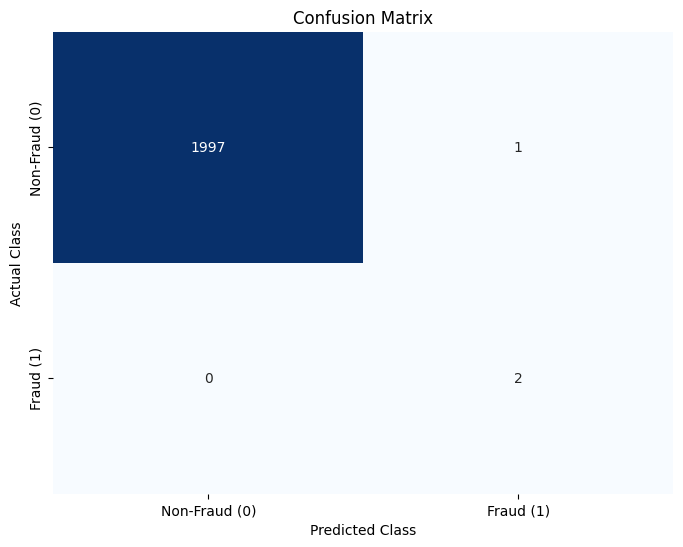

True Positive (TP): 1997
False Negative (FN): 1
True Negative (TN): 2
False Positive (FP): 0
Akurasi: 99.95%
Sensitivitas: 99.95%
Spesifisitas: 100.00%
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
     Prediction
0             0
1             0
2             0
3             0
4             0
..          ...
995           1
996           1
997           1
998           1
999           0

[1000 rows x 1 columns]


In [ ]:
# Import libraries yang diperlukan
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.metrics import accuracy_score, confusion_matrix

# Set seed global
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# Mengubah bentuk data menjadi 3D untuk CNN
# Data input untuk Conv1D harus dalam bentuk (samples, timesteps, features)
X_resampled = X_resampled.reshape((X_resampled.shape[0], X_resampled.shape[1], 1))  # Tambahkan dimensi fitur (1 untuk 1D CNN)
X2_val = X2_val.reshape((X2_val.shape[0], X2_val.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Membangun arsitektur CNN
model = Sequential()

# Layer pertama, convolutional 1D
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_resampled.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))  # MaxPooling untuk mengurangi ukuran input
model.add(Dropout(0.2))  # Dropout untuk mencegah overfitting

# Layer kedua, convolutional 1D
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))

# Flatten layer untuk mengubah output 3D menjadi 1D
model.add(Flatten())

# Fully connected layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

# Layer output
model.add(Dense(1, activation='sigmoid'))  # Sigmoid karena klasifikasi biner

# Kompilasi model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Melatih model dengan data training dan validasi
history = model.fit(X_resampled, y_resampled, epochs=200, batch_size=64, validation_data=(X2_val, y2_val), callbacks=[early_stopping])

# Evaluasi model pada data validation
val_loss, val_acc = model.evaluate(X2_val, y2_val)

# Confusion matrix
y_val_pred = (model.predict(X2_val) > 0.5).astype("int32")
conf_matrix = confusion_matrix(y2_val, y_val_pred)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Non-Fraud (0)', 'Fraud (1)'], yticklabels=['Non-Fraud (0)', 'Fraud (1)'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

# Menampilkan nilai dari confusion matrix
TP, FN, FP, TN = conf_matrix.ravel()
print(f'True Positive (TP): {TP}')
print(f'False Negative (FN): {FN}')
print(f'True Negative (TN): {TN}')
print(f'False Positive (FP): {FP}')

# Menghitung sensitivitas dan spesifisitas
sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
specificity = TN / (TN + FP) if (TN + FP) > 0 else 0

# Menampilkan sensitivitas dan spesifisitas
print(f'Akurasi: {val_acc * 100:.2f}%')
print(f'Sensitivitas: {sensitivity * 100:.2f}%')
print(f'Spesifisitas: {specificity * 100:.2f}%')

# Memprediksi dengan data testing
y_pred = model.predict(X_test)
y_pred_class = (y_pred > 0.5).astype(int)  # Mengubah probabilitas menjadi label kelas (0 atau 1)

# Menyimpan hasil prediksi ke dalam DataFrame
pred_df = pd.DataFrame({'Prediction': y_pred_class.flatten()})

# Menampilkan hasil prediksi
print(pred_df)

In [ ]:
# Menyimpan DataFrame ke file Excel
predictions_df.to_excel("Klasifikasi_CNN.xlsx", index=False)
print("Hasil prediksi disimpan ke 'Klasifikasi_CNN.xlsx'")

Hasil prediksi disimpan ke 'Klasifikasi_CNN.xlsx'
